# Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# ensuring that the graphs  are displayed within the notebook without "calling" them specifically.

%matplotlib inline

In [3]:
# turning a project folder path into a string

path = r'/Users/mart/Documents/09-2022 IBRD  Statement of Loans'

# Importing database

df = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data', 'SoL.pkl'))

# set options to show all columns

pd.set_option('display.max_columns', None)

# check the first rows

df.head()


,Loan Number,Region,Country,Borrower,Guarantor,Loan Type,Loan Status,Interest Rate,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrowers Obligation,Loans Held,Agreement Signing Date,Effective Date (Most Recent),Closed Date (Most Recent)
0,IBRD00010,EUROPE AND CENTRAL ASIA,France,CREDIT NATIONAL,France,NPL,Fully Repaid,4.25,250000000.0,0.0,0.0,250000000.0,38000.00,0.0,0.0,0.0,0.0,1947-05-09,1947-06-09,1947-12-31
5,IBRD00050,LATIN AMERICA AND CARIBBEAN,Chile,Ministry of Finance,Chile,NPL,Fully Repaid,4.50,13500000.0,0.0,0.0,13500000.0,12167000.00,0.0,0.0,0.0,0.0,1948-03-25,1949-04-07,1954-12-31
6,IBRD00060,LATIN AMERICA AND CARIBBEAN,Chile,Ministry of Finance,Chile,NPL,Fully Repaid,3.75,2500000.0,0.0,0.0,2500000.0,755000.00,0.0,0.0,0.0,0.0,1948-03-25,1949-04-07,1950-01-01
13,IBRD00111,LATIN AMERICA AND CARIBBEAN,Brazil,Ministério da Fazenda,Brazil,NPL,Fully Repaid,4.50,75000000.0,0.0,0.0,75000000.0,70971588.97,0.0,0.0,0.0,0.0,1949-01-27,1949-05-09,1953-12-31
14,IBRD00112,LATIN AMERICA AND CARIBBEAN,Brazil,Ministério da Fazenda,Brazil,NPL,Fully Repaid,4.25,15000000.0,0.0,0.0,15000000.0,15000000.00,0.0,0.0,0.0,0.0,1951-01-18,1951-04-10,1954-12-31


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8391 entries, 0 to 8915
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Loan Number                   8391 non-null   string        
 1   Region                        8391 non-null   string        
 2   Country                       8391 non-null   string        
 3   Borrower                      8391 non-null   string        
 4   Guarantor                     8391 non-null   string        
 5   Loan Type                     8391 non-null   string        
 6   Loan Status                   8391 non-null   string        
 7   Interest Rate                 8391 non-null   float64       
 8   Original Principal Amount     8391 non-null   float64       
 9   Cancelled Amount              8391 non-null   float64       
 10  Undisbursed Amount            8391 non-null   float64       
 11  Disbursed Amount              

In [5]:
df.shape

(8391, 20)

# Subsetting and wrangling time-series data

In [6]:
# creating subset containing Interest Rate and Effective Date (Most Recent) 

df_date = df[['Interest Rate','Effective Date (Most Recent)']]

In [7]:
# sort by Effective Date

df_date = df_date.sort_values(by='Effective Date (Most Recent)')

In [8]:
df_date.tail()

,Interest Rate,Effective Date (Most Recent)
8730,0.0,2022-11-16
8789,0.0,2022-12-04
8757,0.0,2022-12-06
8672,0.0,2022-12-24
8797,0.0,2023-01-15


In [9]:
df_date.head()

,Interest Rate,Effective Date (Most Recent)
0,4.25,1947-06-09
17,4.25,1949-03-01
15,4.50,1949-03-15
16,4.50,1949-03-15
5,4.50,1949-04-07


In [10]:
# filter the year range to observe only up to 2022

df_2 = df_date.loc[df_date['Effective Date (Most Recent)'] < '2022-01-01']

In [11]:
df_2.shape

(8295, 2)

In [12]:
df_2.head()

,Interest Rate,Effective Date (Most Recent)
0,4.25,1947-06-09
17,4.25,1949-03-01
15,4.50,1949-03-15
16,4.50,1949-03-15
5,4.50,1949-04-07


In [13]:
# Creating a new dataframe with median Interest Rate grouped by year in Efffective date 

data = df_2.groupby(df_2['Effective Date (Most Recent)'].dt.to_period('Y')).agg({'Interest Rate': ['median']})

data.head()


,Interest Rate
,median
Effective Date (Most Recent),
1947,4.25
1949,4.25
1950,4.25
1951,4.00
1952,4.50


In [14]:
data.shape

(74, 1)

In [15]:
# Checking data types

data.dtypes

Interest Rate  median    float64
dtype: object

In [16]:
# converting an index to timestamp

data.index = data.index.to_timestamp()

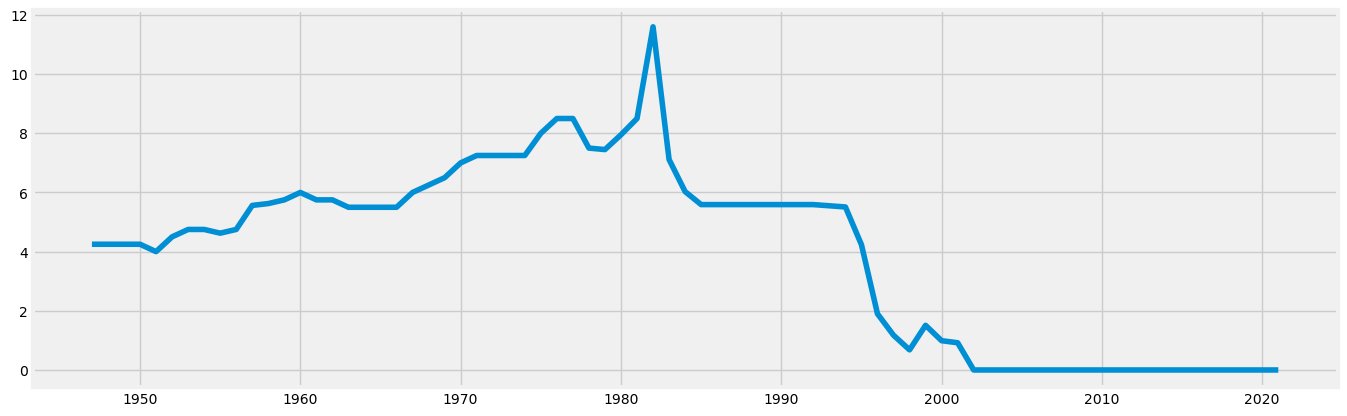

In [17]:
# Plot the data set

plt.figure(figsize=(15,5), dpi=100)# The dpi argument controls the quality of the visualization here. 
# When it's set to 100, it will produce lower-than-standard quality, which is useful if, 
# similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, 
# which could take more time to load and eat up a lot of RAM!


plt.plot(data)

# Time-series analysis: decomposition

In [18]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data, model='additive', period = int(len(data)/2))

In [19]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

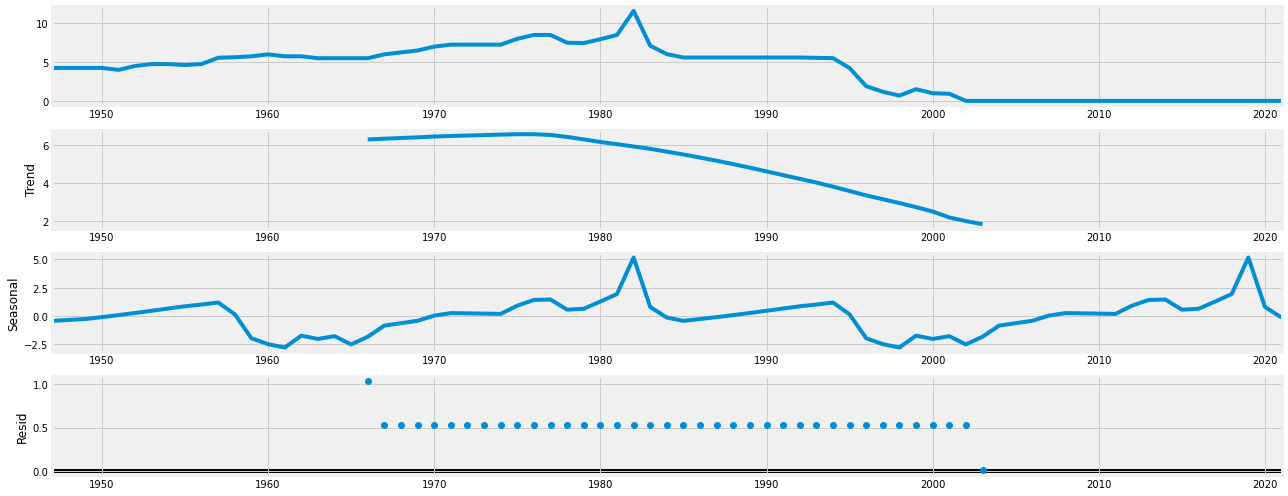

In [20]:
# Plot the separate components

decomposition.plot()
plt.show()

- The chart displays a downward trend in the median Interest rate of loans extended by the World Bank Group from 1947 until 2021.
- The level and trend differ, indicating that the data contains significant removed noise. 
- Seasonal fluctuations are illustrated in a pattern that repeats approx. every 37 years. Interest rates peaked in the early 1980s and again in the late 2010s. 
- There appears to be some noise around the late 1960s.
- The presence of a trend and seasonality implies that the series is not stationary, but a Dickey-Fuller test will be conducted to prove it.

# Testing for stationarity

In [21]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Interest Rate'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.694018
p-value                         0.848293
Number of Lags Used             0.000000
Number of Observations Used    73.000000
Critical Value (1%)            -3.523284
Critical Value (5%)            -2.902031
Critical Value (10%)           -2.588371
dtype: float64


The null hypothesis = the presence of a unit root ( the data is non-stationary)

The alternative hypothesis = there’s no unit root (the data is stationary)

-     - - - Test statistic > critical value = can’t reject null hypothesis 

-     - - - Test statistic < critical value = can reject null hypothesis



- The value of "Critical Value (5%)" is -2.902031. This is significantly less than the test statistic of -0.694018, indicating that the null hypothesis cannot be rejected. 

- The p-value of 0.848293 suggests that the result is not "significant."

- This confirms that the data is non-stationary.

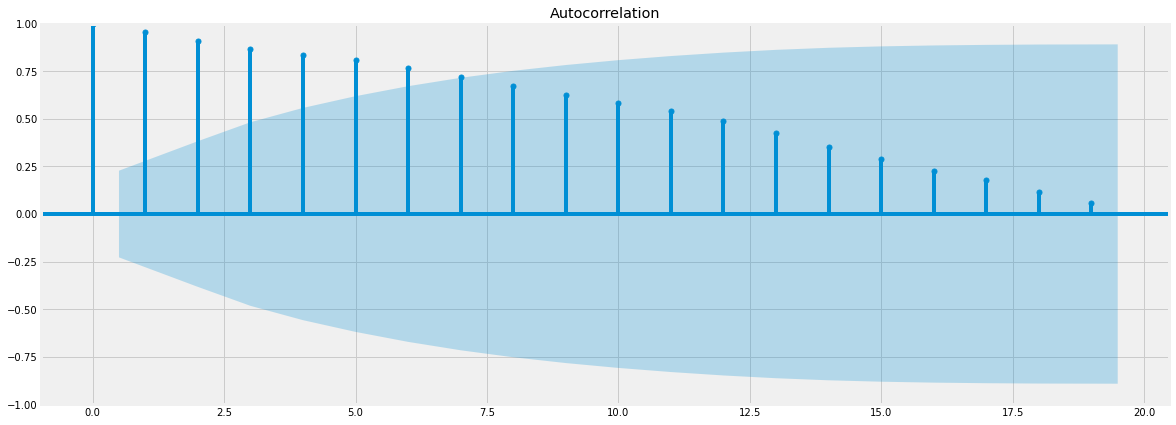

In [22]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data)
plt.show()

- This plot is showing quite a few lags correlated with each other, namely seven lines above the blue edge of the confidence interval. 
- This means there’s a lot of autocorrelated data and the set is likely non-stationary, which supports the result of the Dickey-Fuller test.

# Stationarizing Data

In [23]:
data_diff = data - data.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [24]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [25]:
data_diff.head()

,Interest Rate
,median
Effective Date (Most Recent),
1949-01-01,0.00
1950-01-01,0.00
1951-01-01,-0.25
1952-01-01,0.50
1953-01-01,0.25


In [26]:
data_diff.columns

MultiIndex([('Interest Rate', 'median')],
           )

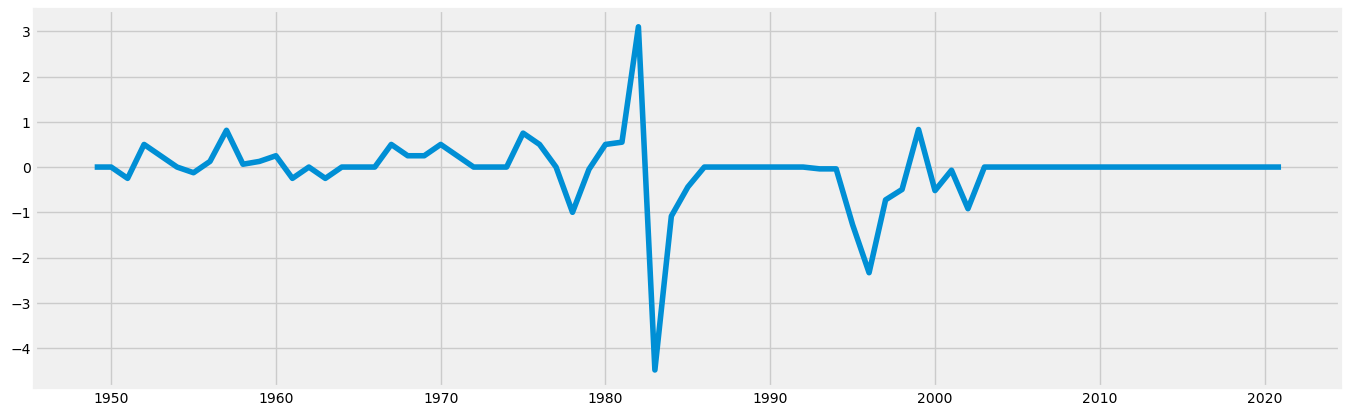

In [27]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [28]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -8.659107e+00
p-value                        4.877029e-14
Number of Lags Used            0.000000e+00
Number of Observations Used    7.200000e+01
Critical Value (1%)           -3.524624e+00
Critical Value (5%)           -2.902607e+00
Critical Value (10%)          -2.588679e+00
dtype: float64


In [29]:
# removing scientific notation

pd.options.display.float_format = '{:.2f}'.format

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -8.66
p-value                        0.00
Number of Lags Used            0.00
Number of Observations Used   72.00
Critical Value (1%)           -3.52
Critical Value (5%)           -2.90
Critical Value (10%)          -2.59
dtype: float64


- The results show that the data has now become stationary. 

- The value of "Critical Value (5%)" (-2.90) is significantly greater than the test statistic of (-8.66), indicating that the null hypothesis can be rejected. 

- The p-value is less than 0.05, suggesting a "significant" result.


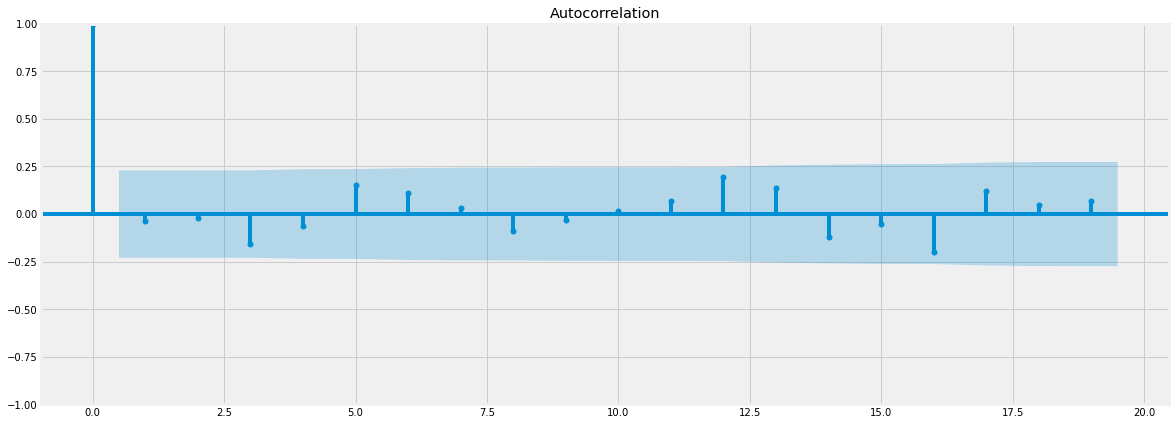

In [30]:
plot_acf(data_diff)
plt.show()

- The autocorrelation plot has improved and now it indicates that the stationary is strong.

# Bonus Task

## Defining Parameters

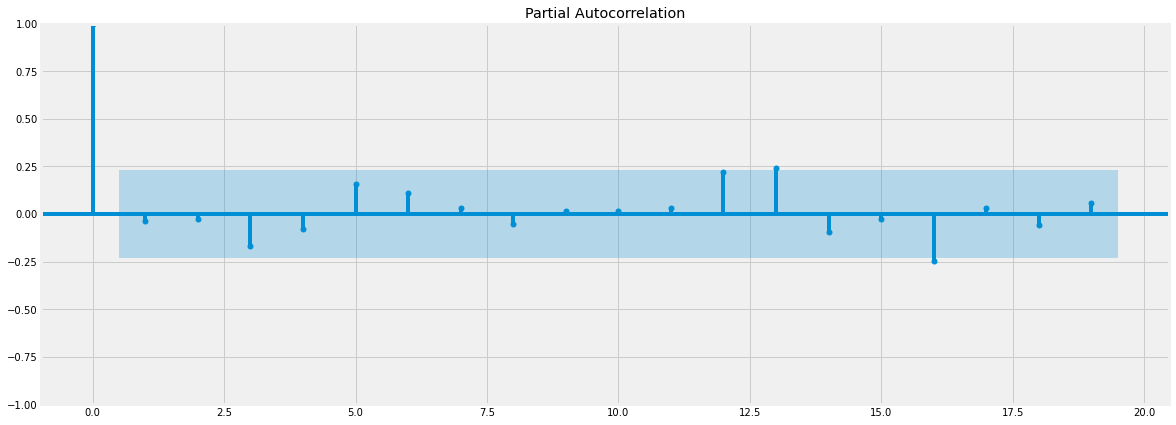

<Figure size 4500x4500 with 0 Axes>

In [31]:
# Plot partial autocorrelations to determine parameter p

plot_pacf(data_diff)
plt.figure(figsize=(15,15), dpi=300)
plt.show()

- In the figure above, we can see some high positive bars. These indicate significant correlations. 

- To estimate how much AR terms we should use, we counted how many “lollipop” are above or below the confidence interval before the next one enter the blue area.

- We will start with p = 1 

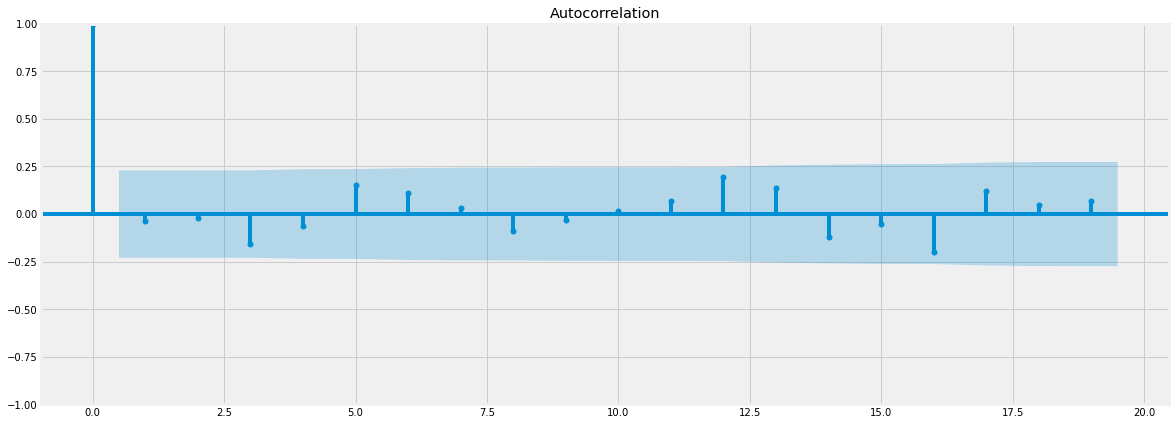

<Figure size 1500x500 with 0 Axes>

In [32]:
# Plot autocorrelations to determine parameter q

plot_acf(data_diff)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

- We don't have any significant autocorrelations (no "lollipops" run beyond the blue border), so we'll see what the output looks like when q = 0.

## Splitting the Data

In [33]:
# reseting index to decide how to split the data

# data_2 = data_diff.reset_index()

# pd.set_option('display.max_rows', None)

# data_2

In [34]:
# Split the data

train = data_diff['Interest Rate'][:37]
test = data_diff['Interest Rate'][36:]

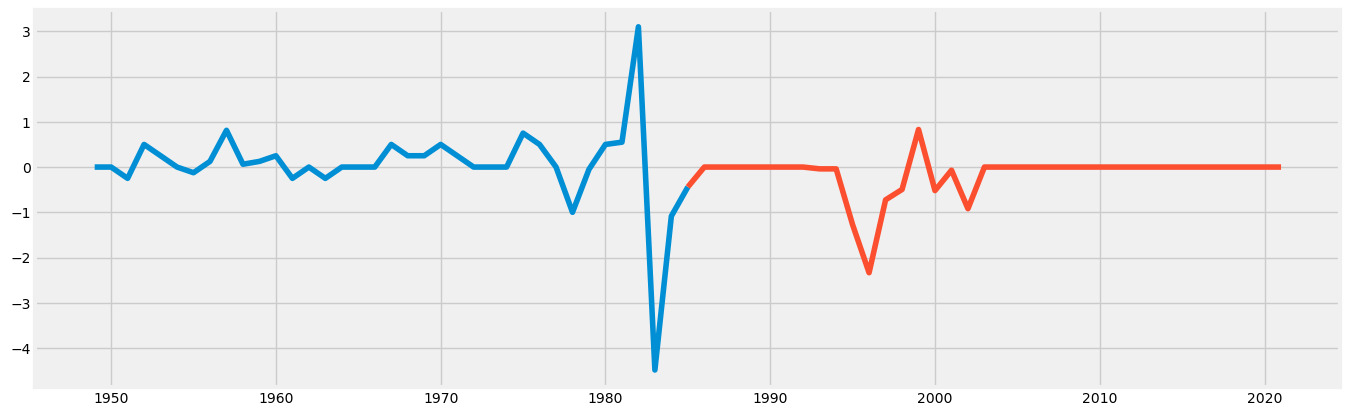

In [35]:
# Plot both sets in order to see the split

plt.figure(figsize=(15,5), dpi=100)
plt.plot(train)
plt.plot(test)

- The blue line represents the training set, and the red line represents the test set.

- Throughout 1980, interest rates spiked, fell briefly and then spiked again. Lending activity decreased, oil prices increased, and unemployment increased. All of this contributed to inflation and a brief recession, after which the economy recovered in the second half of 1980.

- I decided to split the data around 1986 when the effects of the Great Inflation began to wear off.

In [36]:
test.shape

(37, 1)

## Running and Fitting the Model

In [37]:
# importing the model

from statsmodels.tsa.api import ARIMA

model = ARIMA(train, order=(1,1,0))
fitted = model.fit()

# Check model summary

print (fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                 median   No. Observations:                   37
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -59.913
Date:                Mon, 26 Sep 2022   AIC                            123.826
Time:                        15:48:30   BIC                            126.993
Sample:                    01-01-1949   HQIC                           124.931
                         - 01-01-1985                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5244      0.142     -3.703      0.000      -0.802      -0.247
sigma2         1.6188      0.219      7.401      0.000       1.190       2.047
Ljung-Box (L1) (Q):                   1.72   Jarque-

- The coefficient is statistically significant , p is less than 0.05.

In [38]:
# Forecast

fc, se, conf = fitted.forecast(37, alpha=0.05)  # 95% conf


ValueError: too many values to unpack (expected 3)

- ?? Works only with if I put the shape of test=3  -- fc, se, conf = fitted.forecast(3, alpha=0.05)-- but the shape of the test set is 37, not sure what is the problem?? 

In [ ]:
fc = fitted.forecast(37, alpha=0.05)  # 95% conf
se = fitted.forecast(37, alpha=0.05)  # 95% conf
conf = fitted.forecast(37, alpha=0.05)  # 95% conf

- or if I define it separately 

In [ ]:
# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve
lower_series = pd.Series(conf[:,0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(conf[:,1], index=test.index) # Upper bound of the confidence interval



In [ ]:
# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()